## Notebook 1: Data Acquisition and Analysis

**Objective:** The goal of this first notebook is to acquire, clean, and perform an initial exploratory analysis (EDA) of the financial data required to build our trading environment.

**Process:**
1.  Install and import all necessary libraries (`yfinance`, `pandas`, `matplotlib`).
2.  Define the scope of our data: a selection of international, high-cap stocks (e.g., from the S&P 500).
3.  Download the historical price data using `yfinance`.
4.  Perform an initial analysis to check for missing values (NaNs) and understand the data's structure.
5.  Visualize the data to ensure it's correct and to observe price movements.

**Outcome:** The final output will be a clean `DataFrame` containing the historical 'Close' prices for our selected tickers, ready for use in Notebook 02.

First, we need to install and import the necessary Python libraries.
* `yfinance`: To download historical stock market data from Yahoo! Finance.
* `pandas`: For data manipulation and analysis.
* `numpy`: For numerical operations.
* `matplotlib`: For data visualization.

In [1]:
# Install required libraries
!pip install yfinance pandas numpy matplotlib -q

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings for better plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 7)
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


Now, let's define the parameters for our data acquisition.

We will select a basket of 5 major, internationally recognized stocks from the S&P 500. This ensures our agent is trained on relevant, high-volume data. We will also define a 10-year period (2015-2025) to provide a rich history of different market cycles (bull, bear, and sideways markets).

We will download only the `Close` price, as this is the most common signal used for end-of-day trading strategies.

In [2]:
# --- 1. Define Asset Scope ---
# We'll use a mix of major S&P 500 tech stocks for this project
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01' # Using a fixed end date for reproducibility

# --- 2. Download Data ---
# We are only interested in the 'Close' price for each ticker
try:
    data = yf.download(TICKERS, start=START_DATE, end=END_DATE)['Close']
    print("Data downloaded successfully.")
except Exception as e:
    print(f"Error downloading data: {e}")

# Display the first few rows of the downloaded data
if 'data' in locals():
    print(data.head())

/tmp/ipython-input-1817502220.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKERS, start=START_DATE, end=END_DATE)['Close']
[*********************100%***********************]  5 of 5 completed

Data downloaded successfully.
Ticker           AAPL     AMZN      GOOGL       MSFT      NVDA
Date                                                          
2015-01-02  24.237551  15.4260  26.296135  39.933041  0.483038
2015-01-05  23.554745  15.1095  25.795088  39.565838  0.474880
2015-01-06  23.556961  14.7645  25.158480  38.985107  0.460482
2015-01-07  23.887276  14.9210  25.084490  39.480431  0.459282
2015-01-08  24.805088  15.0230  25.171888  40.641880  0.476559


A quick note on the number of tickers:

While we could download the entire S&P 500, we are intentionally starting with 5. In Reinforcement Learning, this is crucial for managing the **"curse of dimensionality"**:

1.  **State Space:** More tickers mean a larger "state" (observation) for the agent to analyze (more prices, more owned shares).
2.  **Action Space:** This is the most important part. The agent has to decide an action for *each* ticker. The complexity of this decision (e.g., allocating a portfolio) grows exponentially with more assets.

By starting with 5, we can build, debug, and train the agent effectively. The goal is to prove the *methodology* (that our PPO agent can learn a profitable policy). Scaling it up to 20, 50, or 100 tickers would be an excellent "Future Improvement" for the project.

---
Next, the most critical step in data preparation: checking for missing values (`NaN`). A single `NaN` will crash the entire training process.

In [3]:
# --- 3. Check for Missing Data (NaNs) ---
print("Checking for missing (NaN) values:")
nan_check = data.isnull().sum()
print(nan_check)

if data.isnull().values.any():
    print("\nMissing values found! Filling them...")
    # Forward-fill (ffill) is a common strategy for time series.
    # It assumes the price on a missing day (e.g., a non-trading day)
    # is the same as the last known price.
    data.ffill(inplace=True)
    print("Missing values filled using forward-fill (ffill).")

    # Double-check
    print("\nRe-checking for NaNs:")
    print(data.isnull().sum())
else:
    print("\nNo missing values found. Data is clean.")

print("\nData describe:")
print(data.describe())

Checking for missing (NaN) values:
Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
NVDA     0
dtype: int64

No missing values found. Data is clean.

Data describe:
Ticker         AAPL         AMZN        GOOGL         MSFT         NVDA
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000
mean      93.858935   101.233089    82.167939   181.012797    20.785709
std       65.441290    54.173887    43.477441   123.188360    32.312595
min       20.604078    14.347500    24.682762    34.501617     0.459282
25%       35.222945    48.397126    47.052846    64.823772     3.544836
50%       64.388023    94.572502    64.266998   146.155922     6.482235
75%      150.234035   153.856247   118.880066   275.278839    21.227499
max      257.853790   232.929993   196.020935   463.240967   148.837326


Finally, let's visualize the data.

We will plot the **normalized price** of all 5 stocks over time. Normalizing (setting the start price to 100) makes it much easier to compare their relative performance, as it shows us the percentage growth from the same starting point.

This confirms our data is loaded correctly and gives us a feel for the market dynamics (e.g., volatility, correlations) that our agent will have to learn.

Plotting normalized price data...


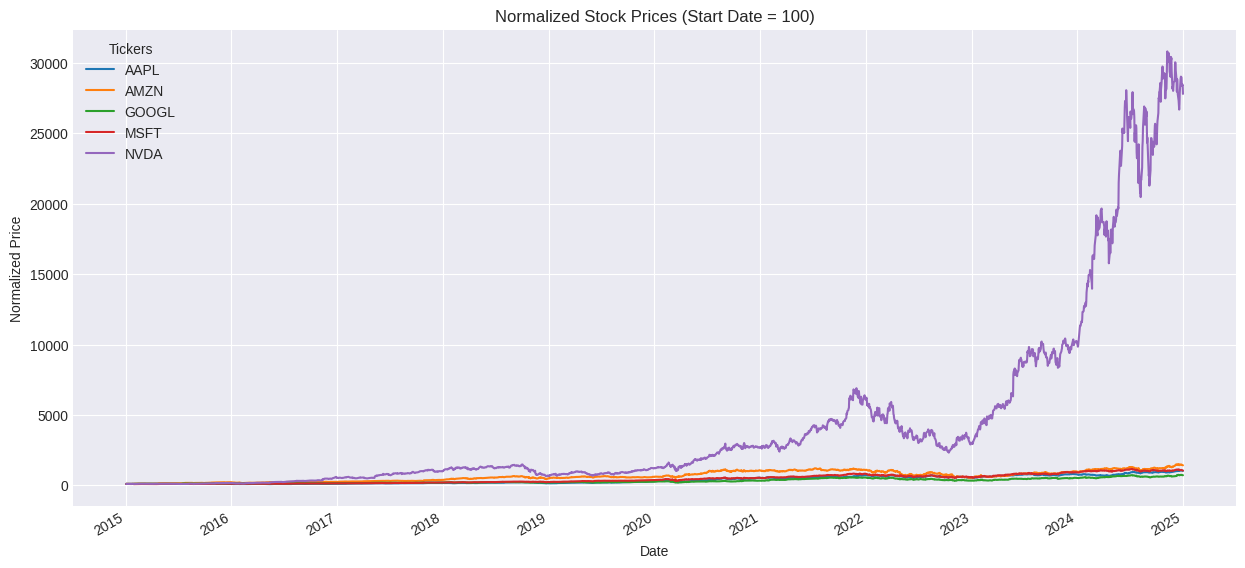

In [4]:
# --- 4. Visualize the Data (Normalized Prices) ---
print("Plotting normalized price data...")

# Normalize data: (price / first_price) * 100
# We use .iloc[0] to get the first row (our starting prices)
normalized_data = (data / data.iloc[0] * 100)

plt.figure(figsize=(15, 7))
normalized_data.plot(ax=plt.gca()) # Plot on the current axes
plt.title('Normalized Stock Prices (Start Date = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(title='Tickers')
plt.grid(True)
plt.show()

This completes our data acquisition and analysis.

The `data` DataFrame is now clean, free of NaNs, and we understand its basic characteristics. We will now save this processed data to a file (a `.csv` file).

This allows our next notebook (`02_Environment_Definition`) to simply load this file, ensuring our experiments are reproducible and fast, without needing to re-download or re-clean the data every time.

In [6]:
# --- 5. Save the Processed Data ---
FILE_PATH = 'sp500_top5_prices_2015_2025.csv'

try:
    data.to_csv(FILE_PATH)
    print(f"Data saved successfully to {FILE_PATH}")
except Exception as e:
    print(f"Error saving data: {e}")

Data saved successfully to sp500_top5_prices_2015_2025.csv
